<a href="https://colab.research.google.com/github/jarifNmohsin/Pytorch-Colab/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [82]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) -->
  # output (3 classes of iris flowers)
 def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
  super().__init__() # instantiate our nn.Module
  self.fc1 = nn.Linear(in_features, h1)
  self.fc2 = nn.Linear(h1, h2)
  self.out = nn.Linear(h2, out_features)


 def forward(self, x):
   x = F.relu(self.fc1(x))
   x = F.relu(self.fc2(x))
   x = self.out(x)

   return x



In [83]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of the model
model = Model()

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [86]:
my_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [87]:
# Change last columns from strings to integers
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df

<ipython-input-87-23a635f5616c>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [88]:
# Train Test Split! Set X,y
X = my_df.drop('species', axis=1)
y = my_df['species']

In [89]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [92]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [93]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [94]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer and learning rate lr
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [95]:
# Train our model!
#Epochs?
epochs = 400
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss
  loss = criterion(y_pred, y_train)

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

    # Do some back propagation: fine tuning
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 and loss: 1.1251550912857056
Epoch: 10 and loss: 1.1235346794128418
Epoch: 20 and loss: 1.1219213008880615
Epoch: 30 and loss: 1.1203196048736572
Epoch: 40 and loss: 1.1187316179275513
Epoch: 50 and loss: 1.1171482801437378
Epoch: 60 and loss: 1.115566372871399
Epoch: 70 and loss: 1.1140087842941284
Epoch: 80 and loss: 1.1124776601791382
Epoch: 90 and loss: 1.1109541654586792
Epoch: 100 and loss: 1.1094492673873901
Epoch: 110 and loss: 1.1079598665237427
Epoch: 120 and loss: 1.1064974069595337
Epoch: 130 and loss: 1.1050658226013184
Epoch: 140 and loss: 1.103645920753479
Epoch: 150 and loss: 1.1022480726242065
Epoch: 160 and loss: 1.1008810997009277
Epoch: 170 and loss: 1.0995395183563232
Epoch: 180 and loss: 1.0982208251953125
Epoch: 190 and loss: 1.0969188213348389
Epoch: 200 and loss: 1.0956319570541382
Epoch: 210 and loss: 1.094359040260315
Epoch: 220 and loss: 1.0931013822555542
Epoch: 230 and loss: 1.0918537378311157
Epoch: 240 and loss: 1.090614914894104
Epoch: 250 and 

Text(0.5, 0, 'Epoch')

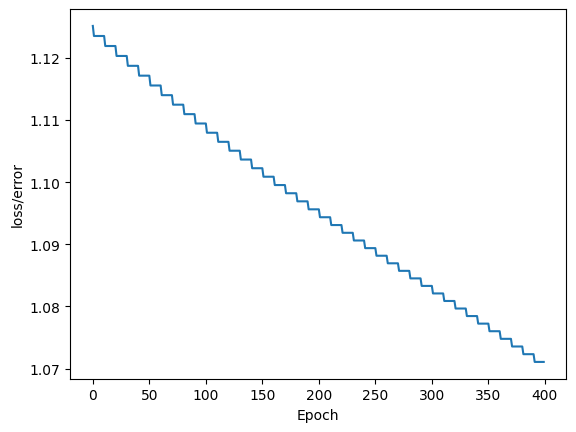

In [96]:
# Graph it out !
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')